In [19]:
import cv2
import numpy as np
import torch
from datetime import datetime
import matplotlib.pyplot as plt
from ultralytics import YOLO

image_path = "./data/sample.jpg"
image = cv2.imread(image_path)

if image is None:
    print(f"Error: Cannot load image from {image_path}")
    exit()
    
def run_model(model: YOLO, image):
    start = datetime.now()  ### 속도 확인 ###
    results = model(image)
    
    # 관절(Keypoints) 좌표 추출 및 시각화
    for result in results:
        keypoints = result.keypoints.xy.cpu().numpy()  # 좌표 변환
        scores = result.keypoints.conf.cpu().numpy()  # 신뢰도 변환

        for kp, score in zip(keypoints[0], scores[0]):
            if score > 0.5:  # 신뢰도 50% 이상
                x, y = int(kp[0]), int(kp[1])
                cv2.circle(image, (x, y), 5, (0, 255, 0), -1)  # 녹색 점으로 표시
    # plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    # plt.axis("off")
    # plt.show()

    took = datetime.now() - start  ### 속도 확인 ###
    return took

In [20]:
model_info = {
    "v8n": YOLO("../../yolov8n-pose.pt"),
    "v11n": YOLO("../../yolo11n-pose.pt"),
    "v11m": YOLO("../../yolo11m-pose.pt"),
    "v11x": YOLO("../../yolo11x-pose.pt"),
}

image = cv2.imread(image_path)
for model in model_info:
    took = run_model(model_info[model], image=image)
    print(model, took)




0: 640x416 1 person, 37.1ms
Speed: 5.8ms preprocess, 37.1ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 416)
v8n 0:00:00.310185

0: 640x416 1 person, 36.9ms
Speed: 2.3ms preprocess, 36.9ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 416)
v11n 0:00:00.329953

0: 640x416 1 person, 50.8ms
Speed: 2.0ms preprocess, 50.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 416)
v11m 0:00:00.468274

0: 640x416 1 person, 40.0ms
Speed: 1.4ms preprocess, 40.0ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 416)
v11x 0:00:00.689490



0: 640x416 1 person, 33.7ms
Speed: 3.5ms preprocess, 33.7ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 416)
YOLOv8n 실행 시간: 0.28s

0: 640x416 1 person, 34.7ms
Speed: 2.6ms preprocess, 34.7ms inference, 5.3ms postprocess per image at shape (1, 3, 640, 416)
YOLOv11n 실행 시간: 0.34s

0: 640x416 1 person, 48.9ms
Speed: 1.8ms preprocess, 48.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 416)
YOLOv11m 실행 시간: 0.48s

0: 640x416 1 person, 31.1ms
Speed: 2.1ms preprocess, 31.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 416)
YOLOv11x 실행 시간: 0.77s


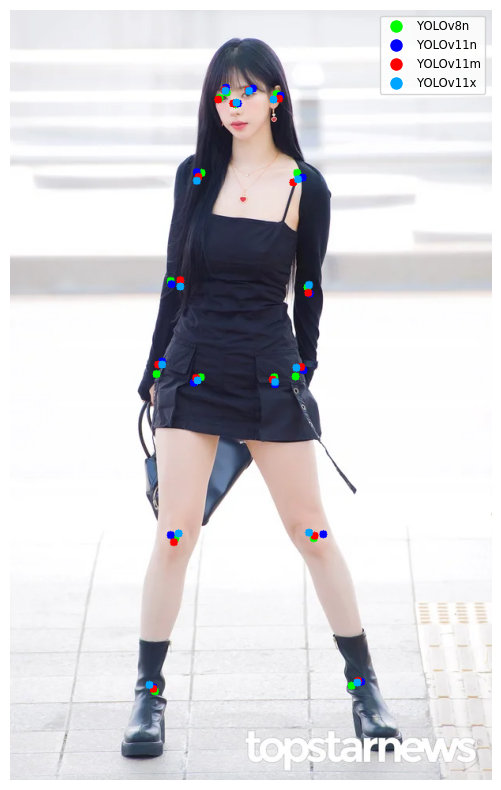

In [23]:
import cv2
import numpy as np
import torch
from datetime import datetime
import matplotlib.pyplot as plt
from ultralytics import YOLO

# 📌 모델 정보 (경로 설정)
model_info = {
    "YOLOv8n": YOLO("../../yolov8n-pose.pt"),
    "YOLOv11n": YOLO("../../yolo11n-pose.pt"),
    "YOLOv11m": YOLO("../../yolo11m-pose.pt"),
    "YOLOv11x": YOLO("../../yolo11x-pose.pt"),
}

# 📌 모델별 색상 매핑 (RGB 형식)
model_colors = {
    "YOLOv8n": (0, 255, 0),   # 초록색 (BGR)
    "YOLOv11n": (255, 0, 0),   # 파란색 (BGR)
    "YOLOv11m": (0, 0, 255),   # 빨간색 (BGR)
    "YOLOv11x": (255, 165, 0), # 주황색 (BGR)
}

# 📌 BGR → RGB 변환 (Matplotlib 범례용)
def bgr_to_rgb(color):
    return (color[2] / 255, color[1] / 255, color[0] / 255)

# 📌 이미지 로드
image_path = "./data/sample.jpg"
image = cv2.imread(image_path)

if image is None:
    print(f"Error: Cannot load image from {image_path}")
    exit()

# 📌 모델 실행 및 시각화 함수
def run_model(model_name, model, image):
    start = datetime.now()  # 속도 측정
    results = model(image)
    color = model_colors[model_name]  # 모델별 색상 (BGR)

    # 📌 관절(Keypoints) 좌표 추출 및 시각화
    for result in results:
        keypoints = result.keypoints.xy.cpu().numpy()  # 좌표 변환
        scores = result.keypoints.conf.cpu().numpy()  # 신뢰도 변환

        for kp, score in zip(keypoints[0], scores[0]):
            if score > 0.5:  # 신뢰도 50% 이상
                x, y = int(kp[0]), int(kp[1])
                cv2.circle(image, (x, y), 5, color, -1)  # 모델별 색상 적용

    took = datetime.now() - start  # 속도 측정
    print(f"{model_name} 실행 시간: {took.total_seconds():.2f}s")

# 📌 모든 모델 실행 (같은 이미지에 결과 반영)
for model_name, model in model_info.items():
    run_model(model_name, model, image)

# 📌 시각화
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # BGR → RGB 변환
plt.axis("off")

# 📌 범례 추가 (BGR → RGB 변환 후 적용)
legend_patches = [
    plt.Line2D([0], [0], marker="o", color="w", markerfacecolor=bgr_to_rgb(color), markersize=10, label=name)
    for name, color in model_colors.items()
]

plt.legend(handles=legend_patches, loc="upper right", fontsize="small")
plt.tight_layout()
plt.show()
